# 0.  Introducción

-Tras varias pruebas de implementación de 5-shot learning desde 0 en pytorch sin obtener resultados concluyentes, hemos decidido adaptadar una solución en fast.ai y ligthly

-Definición de fast.ai

-Definición de ligthly


-La solución original utiliza el datasheet de perros vs gatos de kaggle, pero ha sido posible adaptadarla para clasificar entre leucocitos sanos y con linfoma de burkitt utilizando únicamente 5 imágenes de cada clase. La tasa de acierto es cercana al 80%, sorprendentemente alta para trabajar con un conjunto de entrermaniento de 5 imágenes sanas y 5 imágenes con una enfermedad rara. Debido a que los datos pertencen al hospital clinic y no pueden ser compartidos, se comparte la red con imágenes de frutas del dataset fruits 360. 

El cuaderno original y el artículo que han servido de base a esta implementación están disponibles en las siguientes urls:

https://towardsdatascience.com/few-shot-learning-with-fast-ai-81c66064e372

https://colab.research.google.com/drive/11j4aJv50UxEVZbuUluOGqCMKIZrx7pUM?usp=sharing#scrollTo=gCHeEic3xdhG

# 1. Configurando el entorno


- Instalando paquetes
- Descargando el conjunto de datos

In [2]:
# instalando dependencias
!pip install --upgrade pip
!pip install kaggle --quiet
!pip install fastai --quiet
!pip install lightly --quiet

In [3]:
# importando fast.ai y os para trabajar con carpetas
import os
from fastai.vision import *

In [4]:
#Ocultamos warnings para mejorar la legibilidad del cuaderno el notebook. 

import warnings;
warnings.filterwarnings('ignore');

In [5]:
 #Generamos la semilla

np.random.seed(123)
torch.manual_seed(123)

## 1.1 Descarga de los datos 

1. Nuestro conjunto de datos está compuesto por imágenes de 
1. Click on signin or register on top right to create/ login to your account
1. Once you created your account click on "My Account" go to https://www.kaggle.com/YOUR_USER_NAME/account 
  (replace YOUR_USER_NAME with your kaggle user name)
1. On your user account page scroll down and click on "Generate New API Token"
1. Your browser should now download a "kaggle.json" file with the credentials

In [6]:

#Descarga directa del conjunto de imágenes desde Google Drive, 
!gdown --id 1W7VJ1y1OxhX7Se1G2P9ZGocUnnicWIub

# Descomprimimos el fichero
!unzip frutas2.zip

#Dado que no se puede compartir el dataset de imágenes de células proporcionado por el Hospital Clinic.
#Se comparte la red utilizando imágenes de manzanas y tomates del dataset fruits 360.

#Train 5 manzanas / 5 tomates
#Test  10 manzanas /10 tomates

# 

Downloading...
From: https://drive.google.com/uc?id=1W7VJ1y1OxhX7Se1G2P9ZGocUnnicWIub
To: /content/frutas2.zip
100% 152k/152k [00:00<00:00, 56.1MB/s]
Archive:  frutas2.zip
   creating: frutas2/
   creating: frutas2/test_set/
   creating: frutas2/test_set/manzana/
  inflating: frutas2/test_set/manzana/158_100.jpg  
  inflating: frutas2/test_set/manzana/209_100.jpg  
  inflating: frutas2/test_set/manzana/219_100.jpg  
  inflating: frutas2/test_set/manzana/242_100.jpg  
  inflating: frutas2/test_set/manzana/278_100.jpg  
  inflating: frutas2/test_set/manzana/298_100.jpg  
  inflating: frutas2/test_set/manzana/305_100.jpg  
  inflating: frutas2/test_set/manzana/r_188_100.jpg  
  inflating: frutas2/test_set/manzana/r_229_100.jpg  
  inflating: frutas2/test_set/manzana/r_258_100.jpg  
   creating: frutas2/test_set/tomate/
  inflating: frutas2/test_set/tomate/106_100.jpg  
  inflating: frutas2/test_set/tomate/83_100.jpg  
  inflating: frutas2/test_set/tomate/r2_132_100.jpg  
  inflating: frut

# 2. Selección de la muestra.

Para que el estudio sea más "realista" he utilizado selección aleatoria. Pero el código está preparado para utilizar la libtería de ligthly y seleccionar las más diferentes.

-Nuestra carpeta contiene las seleccionadas, si se desea reutilizar el código para otro proyecto de 5shot learning , es posible subir un conjunto mayor de imágenes a la web de ligthly y mediante filtros seleccionar las 5 más diferentes, para que funcione mejor con imágenes desconocidas y evitar  en medida de lo posible el overfit . En la web de ligthly se pueden crear los filtros y seleccionar las más diferentes 


## 2.1 Uso de Lightly -Dado que es un ejemplo con frutas, esta sección aparece comentada en el repositori.

1. Ir a la web app.lightly.ai
1. Acceder a la cuenta o crear una neuva
1. Acceder a My Datasets
1. Crear un nuevo dataset con la opción "Create a new dataset"
1. Utilizando el token de usuario y el del dataset podremos utilizar  el CLI whattolabel para subir nuestras imágenes.



In [ ]:
# Definimos nuestro token de usuario de ligthly y el token del dataset 
TOKEN = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
DATASET_ID = 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYY'

In [ ]:
## Utilizamos Lightly para transformar nuestras imágenes en embeddings. 
# Lightly utiliza aprendizaje semi-supervisadoise que permite crear embeddings sin etiquetas. 

#!lightly-magic input_dir='Cells3/training_set' hydra.run.dir=./ trainer.max_epochs=1 loader.batch_size=256 collate.input_size=64 

In [ ]:
# Subimos las imágenes a nuestra cuenta de Lightly, donde podremos realizar filtros si es necesario
#!lightly-upload input_dir='Cells3/training_set' embeddings='/content/embeddings.csv' token=$TOKEN dataset_id=$DATASET_ID upload='thumbnails'

## 2.2 Submuestreo en ligthly

1. Si quisieramos realizar un submuestro, podríamos hacerlo directamente desde la web de ligthly, en nuestro caso hemos realizado una selección local. Por lo que utilizaremos todas las imágenes que hay en train. Etiqueta= initial-tag


In [ ]:
# Como ya hemos realizado el muestreo, utilziamos la etiqueta initial-tag de ligthly
#TAG_NAME = 'initial-tag'

## 2.3 Descargamos las imágenes y anotaciones



In [ ]:
#!lightly-download tag_name=$TAG_NAME input_dir='Cells3/training_set' output_dir='Cells3/tiny_set' token=$TOKEN dataset_id=$DATASET_ID 

# 3. Train a model with few-shot learning

Con fast.ai reaulta sencillo realizar finetunning de un modelo preentrenado. 
En neustro caso vamos a utilizar un modelo resnet18 preentrenado con Imagenet y realizaremos finetunning para clasificar entre linfocitos sanos y afectados por linfoma de Burkkit. 


In [15]:
# Definicimos la carpeta que contiene las imágenes que contiene las imágenes
data = ImageList.from_folder('frutas2')


In [16]:
# Entrenamos train y test, 
data = data.split_by_folder(train='training_set', valid='test_set')


In [17]:
# La esctructura de carpetas contiene la clase a la que pertenece cada imagen
#Por lo que utilizamos label_from_folde()
data = data.label_from_folder()

In [18]:
# Utilizamos data augmentation para enriquecer nuestro conjunto de entrenamiento
data = data.transform(get_transforms(do_flip=True, flip_vert=True), size=224)

In [20]:
# data bunch
data = data.databunch(bs=4)

In [21]:
#  Normalizamos las imágenes con los stats de imagenet
data = data.normalize(imagenet_stats)

In [22]:
# Utilziamos un  resnet-18 and evaluamos  accuracy
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [23]:
learner.fit_one_cycle(16, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.807797,1.229161,0.450000,00:00
1,1.603907,1.133877,0.400000,00:00
2,1.616892,0.750693,0.550000,00:00
3,1.236146,0.583431,0.750000,00:00
4,1.129304,0.300517,0.900000,00:00
5,0.937352,0.192666,0.950000,00:00
6,0.833949,0.103785,1.000000,00:00
7,0.739569,0.073736,0.950000,00:00
8,0.676841,0.043985,1.000000,00:00
9,0.603905,0.029208,1.000000,00:00


In [ ]:
dos

# 4. Resultados
El modelo funciona genial, teniendo en cuenta que ha sido entrenado con 5 imágenes de cada clase. Sin embargo este problema es mucho más sencillo que el inicial con imágenes de células

In [24]:
interp = ClassificationInterpretation.from_learner(learner)

A continuación se muestra la matriz de confusión. Se ha conseguido un 100% de precisión clasificando manzanas y tomates. Como hemos comentado anteriormente, diferenciar entre leucocitos sanos y enfermos es mucho más complejo. Y se consiguió una precisión del 85% aprox. 

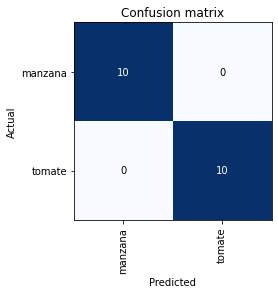

In [25]:
interp.plot_confusion_matrix()

Mostramos las imágenes con mayor pérdida. 

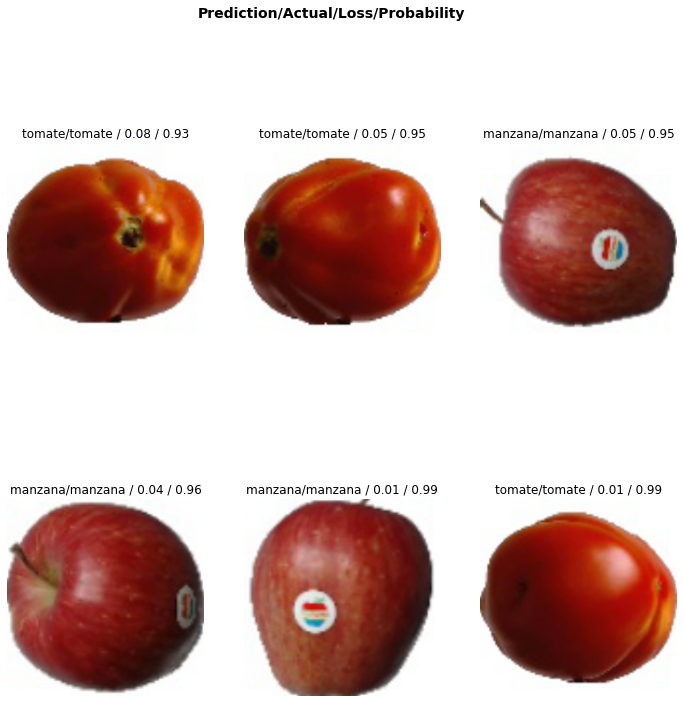

In [26]:
interp.plot_top_losses(6, figsize=(12,12))

In [27]:
#Nuestro accuracy  con frutas es del 100% 

Accuracy= (20/20)
Accuracy

1.0